# Dataset loading 

#Importing all necessary libraries


In [ ]:
df.corr()

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
sns.set(color_codes=True)

from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import  WordCloud, STOPWORDS, ImageColorGenerator

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.ensemble import StackingClassifier

Reading in the dataset

In [140]:
df = pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Checking Dataset shape (rows X columns)

In [142]:
df.shape

(568454, 10)

# Data Description and missing value treatment

Basic statistical analysis on dataset

In [ ]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


Checking dataset attribute types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


To see if there are any columns having missing values

In [ ]:
df.count() 

Id                        568454
ProductId                 568454
UserId                    568454
ProfileName               568438
HelpfulnessNumerator      568454
HelpfulnessDenominator    568454
Score                     568454
Time                      568454
Summary                   568427
Text                      568454
dtype: int64

In [ ]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [ ]:
len(df) - len(df.dropna())

43

# Visualization


Creating a new atrribute text length

In [ ]:
df['Text Length'] = df["Text"].str.len()
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text Length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,263
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,509
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,219
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,140


Checking out the counts of various text lengths

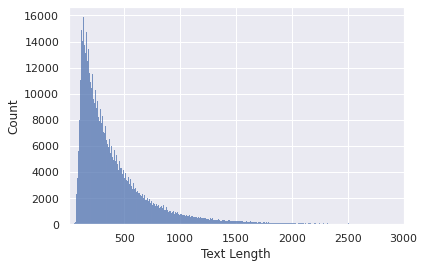

In [ ]:
fig, ax = plt.subplots()
sns.histplot(df['Text Length'], ax=ax)
ax.set_xlim(1,3000)
plt.show()

The most common review text length is approximately 100, which is about 1-2 sentences. Text length count decreases exponentially after hitting the peak with barely any reviews over 1000 text length.

Splitting the text into words and calculating count of total number of words

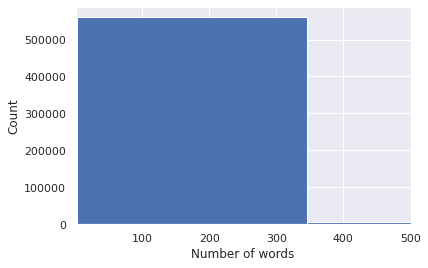

In [ ]:
fig, ax = plt.subplots()
df['Text'].str.split().\
    map(lambda x: len(x)).\
    hist(ax=ax)
ax.set_xlim(1,500)
ax.set(xlabel='Number of words', ylabel='Count')
plt.show()

Number of words count is universally distributed from 0 to roughly 340. 



Visualizing Average word length

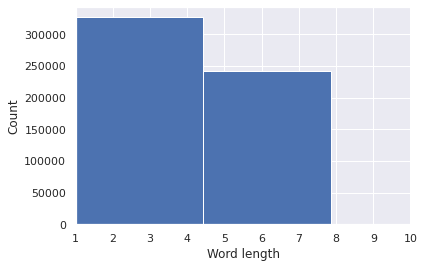

In [ ]:
fig, ax = plt.subplots()
df['Text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()
ax.set_xlim(1,10)
ax.set(xlabel='Word length', ylabel='Count')
plt.show()

The count of words with < 5 word length is more than > 5 case. This is likely because most of repetetive words like *a,the,then,if,but,are,is* are < 5 word length

As expected, the most repetitive words like *i, the, this, good* are the most common ones.

Visualizing most common trigrams in the 'Text' column

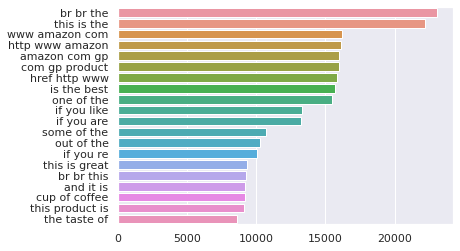

In [ ]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

top_tri_grams=get_top_ngram(df['Text'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

This graphs shows the most common phrases. Interestingly phrases 'if you are' , 'if you like' are pretty common which shows reviewers are trying to give personalised reviews. Rest of it is generic common phrases.

Most commonly reviewed products


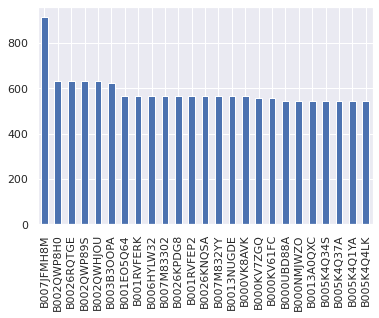

In [ ]:
n = 25
df['ProductId'].value_counts()[:n].plot(kind='bar')

**What does the product-reviewer graph look like?**

We can assume product-reviewer graph would be same as product-reviewcount graph as each reviewer is likely to leave just 1 review.
Here we can see the top most reviewed products in the dataset 


Converting all entries in the 'Text' column to string

In [ ]:
for i in range(0,len(df)-1):
    if type(df.iloc[i]['Text']) != str:
        df.iloc[i]['Text'] = str(df.iloc[i]['Text'])

Filling in value 'No' in place of missing entries in the 'Summary' column

In [ ]:
df['Summary'] = df['Summary'].fillna('No').apply(str)

Converting all entries in the 'Summary' column to string

In [ ]:
for i in range(0,len(df)-1):
    if type(df.iloc[i]['Summary']) != str:
        df.iloc[i]['Summary'] = str(df.iloc[i]['Summary'])

Score wise number of reviews availabe to work with

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


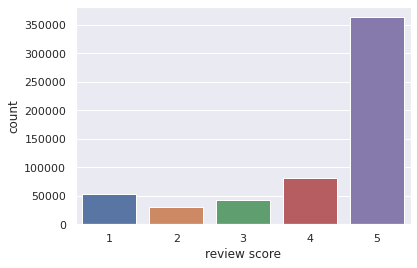

In [ ]:
sns.countplot(df.Score)
plt.xlabel('review score');

**How does review score distribution vary across reviewers?**


The number of 5 score reviews highly outnumber the others. The number of 1,2,3,4 scores are roughly in the same range. This shows that either most customers giving reviews are satisfied ones, or just that most customers are satisfied!




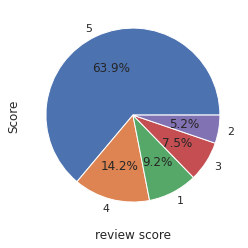

In [ ]:
df['Score'].value_counts().plot.pie(autopct="%.1f%%");
plt.xlabel('review score');

This gives a better understanding out the previous graph as we can clearly see how 63.9% of total reviews have a perfect score.

Defining and creating the 'Sentiment' feature for the dataset

In [ ]:
def sentiment(n):
    if n>=3:
        return 1
    else:
        return -1
df['Sentiment'] = df['Score'].apply(sentiment)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text Length,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,263,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190,-1
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,509,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,219,-1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,140,1


Sentiment wise number of reviews availabe to work with

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'review sentiment')

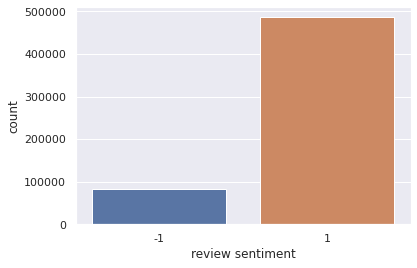

In [ ]:
ax = sns.countplot(df.Sentiment)
plt.xlabel('review sentiment')

Number of positive sentiment reviews by far outnumber the negative sentiment ones.


In [ ]:
pip install wordcloud

Visualizing the most commonly used words

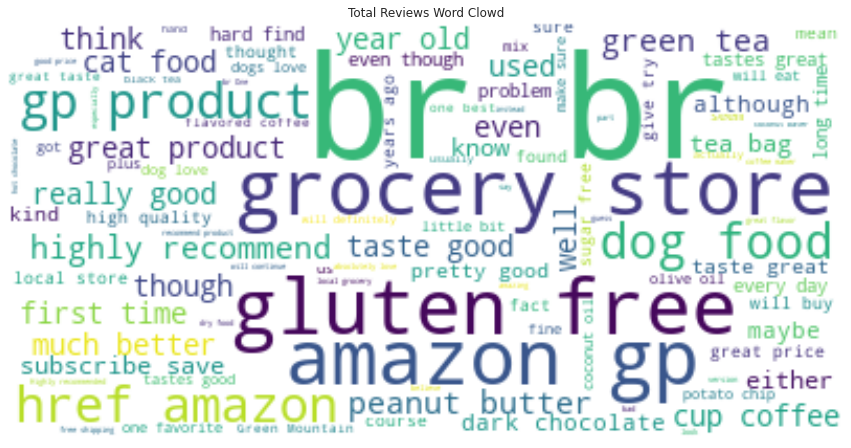

In [ ]:
# Get stopwords from wordcloud library
stopwords = set(STOPWORDS)

# join all reviews
text = " ".join(Text for Text in df.Text)
 
# Generate the image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100).generate(text)
 
# visualize the image
fig=plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Total Reviews Word Clowd')
plt.show()

**What types of food products get reviewed the most?**


*   Green tea
*   Peanut butter
*   Coffee
*   Cat Food
*   Dog Food
*   Dark chocolate




Visualizing the most commonly used words for postive sentiment

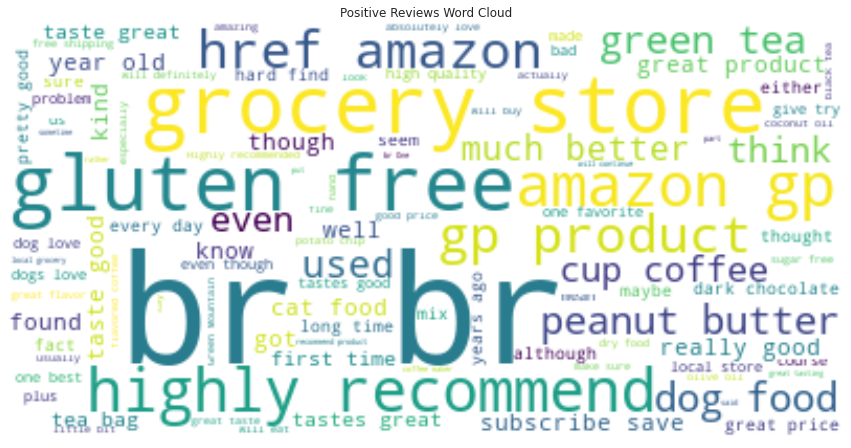

In [ ]:
df1=df[df['Sentiment']==1]
dfnot1=df[df['Sentiment']==-1]
# join all reviews
text = " ".join(Text for Text in df1.Text)
 
# Generate the image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100).generate(text)
 
# visualize the image
fig=plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Positive Reviews Word Cloud')
plt.show()

**What words tend to indicate positive reviews**


*   highly recommend
*   gluten free
*   great product
*   tastes great
*   great price













Visualizing the most commonly used words for negative sentiment

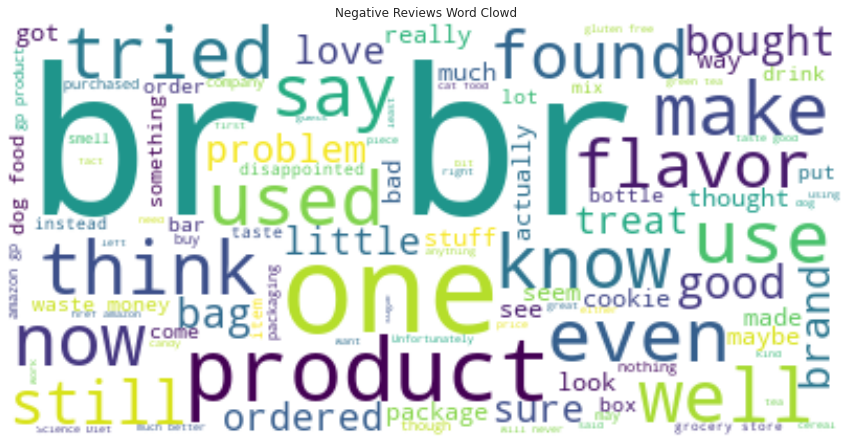

In [ ]:
# join all reviews
text = " ".join(Text for Text in dfnot1.Text)
 
# Generate the image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100).generate(text)
 
# visualize the image
fig=plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Negative Reviews Word Clowd')
plt.show()

**What words tend to indicate negative reviews**



*   disappointed
*   waste money
*   unfortunately
*   will never
*   bad



Displaying the most commonly appearing words in the most helpful reviews

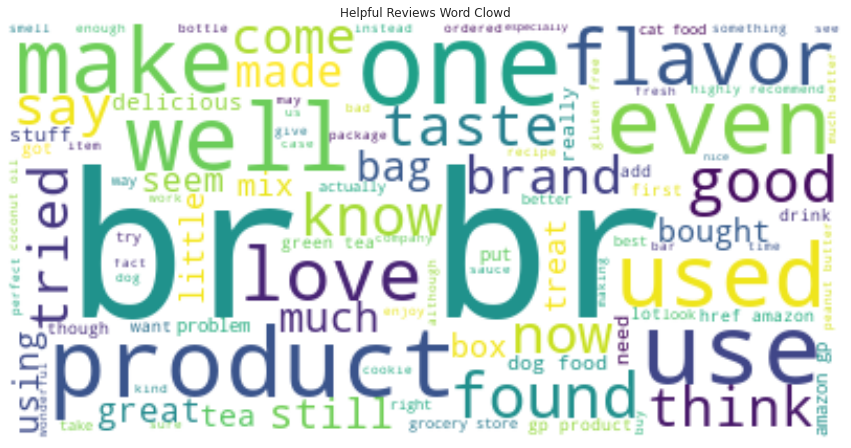

In [ ]:
dfhelpful=df[df['HelpfulnessNumerator']>3]
text = " ".join(Text for Text in dfhelpful.Text)
 
# Generate the image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100).generate(text)
 
# visualize the image
fig=plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Helpful Reviews Word Clowd')
plt.show()

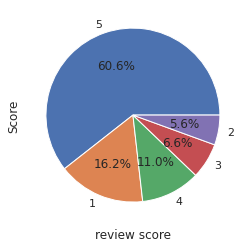

In [ ]:
dfhelpful['Score'].value_counts().plot.pie(autopct="%.1f%%");
plt.xlabel('review score');

**What makes a review helpful**

On average negative reviews(1 and 2 scores) account for 14 percent of total reviews. 
However for helpful reviews it accounts for 22 percent of total reviews, which show us that helpful reviews are more critical than average.

Other than this, a few interesting words from the word cloud are


*   Tried
*   Used
*   Found
*   Know
*   Better
*   Highly Recommend




# Text preprocessing


Cleaning out urls from the 'Text' and 'Summary' columns as they do not help portray sentiment

In [ ]:
def clean_url(review_text):
  return re.sub(r'https\S+',' ',review_text)

df['Text'] = df['Text'].apply(clean_url) 
df['Summary'] = df['Summary'].apply(clean_url)

Cleaning out non alpha-numeric characters from the 'Text' and 'Summary' columns as they do not help portray sentiment

In [ ]:
def clean_non_alpha(review_text):
  return re.sub('[^a-zA-Z]',' ',review_text)

df['Text'] = df['Text'].apply(clean_non_alpha) 
df['Summary'] = df['Summary'].apply(clean_non_alpha)

Lowercasing all characters in the 'Text' and 'Summary' columns

In [ ]:
def clean_lowercase(review_text):
  return str(review_text).lower()

df['Text'] = df['Text'].apply(clean_lowercase) 
df['Summary'] = df['Summary'].apply(clean_lowercase)

Tokenizing all words in the 'Text' and 'Summary' columns as they do not help portray sentiment

In [ ]:
nltk.download('punkt')
def clean_tokenizer(review_text):
  return word_tokenize(review_text)

df['Text'] = df['Text'].apply(clean_tokenizer) 
df['Summary'] = df['Summary'].apply(clean_tokenizer)

Cleaning out stopwords from the 'Text' and 'Summary' columns as they do not help portray sentiment

In [ ]:
nltk.download('stopwords')
stopwords.words('english')
stop_words = set(stopwords.words('english'))
def clean_stopwords(token):
  return [item for item in token if item not in stop_words]

df['Text'] = df['Text'].apply(clean_stopwords) 
df['Summary'] = df['Summary'].apply(clean_stopwords)

Stemming all words in the 'Text' and 'Summary' columns 

In [ ]:
stemmer = PorterStemmer()
def clean_stem(token):
  return [stemmer.stem(i) for i in token]

df['Text'] = df['Text'].apply(clean_stem) 
df['Summary'] = df['Summary'].apply(clean_stem)

Lemmatizing all words in the 'Text' and 'Summary' columns 

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemma = WordNetLemmatizer()
def clean_lemmatization(token):
  return [lemma.lemmatize(word=w,pos='v') for w in token]

df['Text'] = df['Text'].apply(clean_lemmatization) 
df['Summary'] = df['Summary'].apply(clean_lemmatization)

Cleaning out all words with length less than 2 from the 'Text' and 'Summary' columns as they do not help portray sentiment

In [ ]:
def clean_length(token):
  return [i for i in token if len(i)>2]

df['Text'] = df['Text'].apply(clean_length) 
df['Summary'] = df['Summary'].apply(clean_length)

Converting the tokenized words back to string in the 'Text' and 'Summary' columns

In [ ]:
def convert_to_string(listReview):
  return ' '.join(listReview)

df['Text'] = df['Text'].apply(convert_to_string) 
df['Summary'] = df['Summary'].apply(convert_to_string)

Creating an 'All_features' column that contains the concatenation of 'Summary' and 'Text' for each review

In [ ]:
def combined_features(row):
    return row['Summary'] + ' '+ row['Text']
df['All_features'] = df.apply(combined_features, axis=1)
df.head()

Dumping the pre-processed csv file so we don't need to run the same functions again and again

In [ ]:
df.to_csv('preprocessed.csv',index=False)

Reading the preprocessed file into the df_pre_processed pandas dataframe

In [ ]:
df_pre_processed = pd.read_csv('preprocessed.csv')
df_pre_processed.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,All_features,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,good qualiti dog food,buy sever vital can dog food product find good...,good qualiti dog food buy sever vital can dog ...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,advertis,product arriv label jumbo salt peanut peanut a...,advertis product arriv label jumbo salt peanut...,-1
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,delight say,confect around centuri light pillowi citru gel...,delight say confect around centuri light pillo...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,cough medicin,look secret ingredi robitussin believ find get...,cough medicin look secret ingredi robitussin b...,-1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,great taffi,great taffi great price wide assort yummi taff...,great taffi great taffi great price wide assor...,1


In [ ]:
df_pre_processed.shape

(568454, 12)

# Base models for sentiment and score prediction



1. We shall be using the LogisticRegression() model as the base model for Sentiment prediction to work through the various options availabe as shown in the next sections.
2. We shall be using the ComplementNB() model as the base model for Score prediction to work through the various options availabe as shown in the next sections.

# Splitting Data


Defining the target and predicting variables/columns/features from the dataset

In [145]:
X_all_features = df_pre_processed['All_features']
y_sentiment = df_pre_processed['Sentiment']
y_score = df_pre_processed['Score']

Splitting the data into test and train sets to be used with the models.


In [146]:
X_train_sentiment, X_test_sentiment, y_train_sentiment, y_test_sentiment = train_test_split(X_all_features, y_sentiment, test_size=0.3, random_state=0)

X_train_score, X_test_score, y_train_score, y_test_score = train_test_split(X_all_features, y_score, test_size=0.3, random_state=0)


# CountVectorizer vs Tfidf

## CountVectorizer()

Using the CountVectorizer() function to develop and fit an embedding vocabulary for Sentiment Prediction

In [147]:
cv1 = CountVectorizer()
ctmTr_sentiment = cv1.fit_transform(X_train_sentiment) 
X_test_dtm_sentiment = cv1.transform(X_test_sentiment)

Predicting Sentiment using the base LogisticRegression() model and evaluating the developed model for sentiment prediction

0.9315515108158346
              precision    recall  f1-score   support

          -1       0.82      0.68      0.74     24751
           1       0.95      0.97      0.96    145786

    accuracy                           0.93    170537
   macro avg       0.88      0.83      0.85    170537
weighted avg       0.93      0.93      0.93    170537



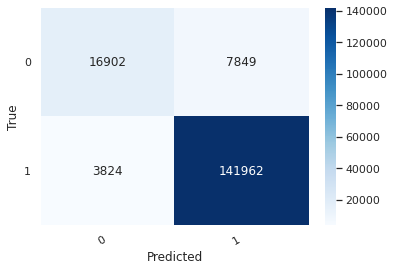

In [148]:
#Base LR for sentiment prediction

logisticRegr = LogisticRegression(max_iter=1000)
logisticRegr.fit(ctmTr_sentiment, y_train_sentiment)
lgr_predictions = logisticRegr.predict(X_test_dtm_sentiment)

accuracy = logisticRegr.score(X_test_dtm_sentiment, y_test_sentiment)
print (accuracy)

print(classification_report(y_test_sentiment, lgr_predictions)) 

# creating a confusion matrix
cm = confusion_matrix(y_test_sentiment, lgr_predictions)
hmap = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True')
plt.xlabel('Predicted');
class_names = ['Negative','Positive']
df_cm = pd.DataFrame(cm,index=class_names,columns=class_names)

Using the CountVectorizer() function to develop and fit an embedding vocabulary for Score Prediction

In [149]:
cv2 = CountVectorizer()
ctmTr_score = cv2.fit_transform(X_train_score)
X_test_dtm_score = cv2.transform(X_test_score)

Predicting Sentiment using the base ComplementNB() model and evaluating the developed model for score prediction

0.7048910207169119
              precision    recall  f1-score   support

           1       0.45      0.82      0.58     15594
           2       0.47      0.13      0.20      9157
           3       0.42      0.24      0.31     12687
           4       0.41      0.36      0.38     24325
           5       0.85      0.87      0.86    108774

    accuracy                           0.70    170537
   macro avg       0.52      0.48      0.47    170537
weighted avg       0.70      0.70      0.69    170537



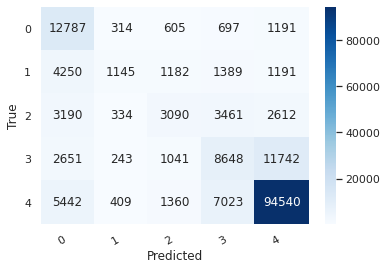

In [150]:
#Base ComplementNB model for sentiment prediction

CNB = ComplementNB()
CNB.fit(ctmTr_score, y_train_score)
CNB_predictions = CNB.predict(X_test_dtm_score)

accuracy = CNB.score(X_test_dtm_score, y_test_score)
print (accuracy)

print(classification_report(y_test_score, CNB_predictions)) 

# creating a confusion matrix
cm = confusion_matrix(y_test_score, CNB_predictions)
hmap = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True')
plt.xlabel('Predicted');
class_names = ['1','2','3','4','5']
df_cm = pd.DataFrame(cm,index=class_names,columns=class_names)

## TfidfVectorizer()

Using the TfidfVectorizer() function to develop and fit an embedding vocabulary for Sentiment Prediction

In [151]:
tf1 = TfidfVectorizer()
ctmTr_sentiment = tf1.fit_transform(X_train_sentiment)
X_test_dtm_sentiment = tf1.transform(X_test_sentiment)

Predicting Sentiment using the base LogisticRegression() model and evaluating the developed model for sentiment prediction

0.9287192808598721
              precision    recall  f1-score   support

          -1       0.83      0.65      0.72     24751
           1       0.94      0.98      0.96    145786

    accuracy                           0.93    170537
   macro avg       0.88      0.81      0.84    170537
weighted avg       0.93      0.93      0.93    170537



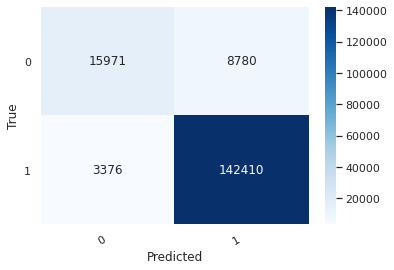

In [152]:
#Base LR for sentiment prediction

logisticRegr = LogisticRegression(max_iter=1000)
logisticRegr.fit(ctmTr_sentiment, y_train_sentiment)
lgr_predictions = logisticRegr.predict(X_test_dtm_sentiment)

accuracy = logisticRegr.score(X_test_dtm_sentiment, y_test_sentiment)
print (accuracy)

print(classification_report(y_test_sentiment, lgr_predictions)) 

# creating a confusion matrix
cm = confusion_matrix(y_test_sentiment, lgr_predictions)
hmap = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True')
plt.xlabel('Predicted');
class_names = ['Negative','Positive']
df_cm = pd.DataFrame(cm,index=class_names,columns=class_names)

Using the TfidfVectorizer() function to develop and fit an embedding vocabulary for Score Prediction

In [153]:
tf2 = TfidfVectorizer()
ctmTr_score = tf2.fit_transform(X_train_score)
X_test_dtm_score = tf2.transform(X_test_score)

Predicting Sentiment using the base ComplementNB() model and evaluating the developed model for score prediction

0.706697080398975
              precision    recall  f1-score   support

           1       0.46      0.81      0.59     15594
           2       0.43      0.13      0.19      9157
           3       0.45      0.22      0.30     12687
           4       0.43      0.27      0.33     24325
           5       0.82      0.90      0.85    108774

    accuracy                           0.71    170537
   macro avg       0.52      0.46      0.45    170537
weighted avg       0.68      0.71      0.68    170537



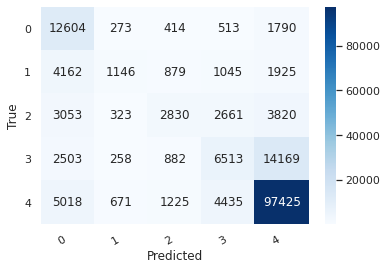

In [154]:
#Base ComplementNB model for sentiment prediction

CNB = ComplementNB()
CNB.fit(ctmTr_score, y_train_score)
CNB_predictions = CNB.predict(X_test_dtm_score)

accuracy = CNB.score(X_test_dtm_score, y_test_score)
print (accuracy)

print(classification_report(y_test_score, CNB_predictions)) 

# creating a confusion matrix
cm = confusion_matrix(y_test_score, CNB_predictions)
hmap = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True')
plt.xlabel('Predicted');
class_names = ['1','2','3','4','5']
df_cm = pd.DataFrame(cm,index=class_names,columns=class_names)

## Observations : 

1. As can be seen the CountVectorizer() has better performance in all metrics used for Sentiment Prediction as compared to TfidfVectorizer()
2. CountVectorizer() has better overall performance in Score Prediction as compared to TfidfVectorizer()

Hence, the CountVectorizer() shall be used from here on in.


# Original dataset vs One where duplicates are dropped


Creating a dataset where duplicate values in the 'All_features' column is dropped. 
As can be seen, the number of rows has reduced significantly

In [160]:
df_pre_processed_dropped = df_pre_processed.drop_duplicates(subset ="All_features",keep = 'first')
df_pre_processed_dropped.shape

(394296, 12)

Basic statistical analysis on this new dataset

In [ ]:
df_pre_processed_dropped.describe()

Defining the target and predicting variables/columns/features from the dataset

In [163]:
X_all_features = df_pre_processed_dropped['All_features']
y_sentiment = df_pre_processed_dropped['Sentiment']
y_score = df_pre_processed_dropped['Score']

Splitting the data into test and train sets to be used with the models.


In [164]:
X_train_sentiment, X_test_sentiment, y_train_sentiment, y_test_sentiment = train_test_split(X_all_features, y_sentiment, test_size=0.3, random_state=0)

X_train_score, X_test_score, y_train_score, y_test_score = train_test_split(X_all_features, y_score, test_size=0.3, random_state=0)


Using the CountVectorizer() function to develop and fit an embedding vocabulary for Sentiment Prediction

In [165]:
cv1 = CountVectorizer()
ctmTr_sentiment = cv1.fit_transform(X_train_sentiment) 
X_test_dtm_sentiment = cv1.transform(X_test_sentiment)

Predicting Sentiment using the base LogisticRegression() model and evaluating the developed model for sentiment prediction

0.9198488447784663
              precision    recall  f1-score   support

          -1       0.77      0.64      0.70     17137
           1       0.94      0.97      0.95    101152

    accuracy                           0.92    118289
   macro avg       0.85      0.80      0.83    118289
weighted avg       0.92      0.92      0.92    118289



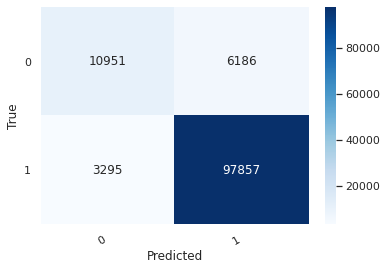

In [166]:
#Base LR for sentiment prediction

logisticRegr = LogisticRegression(max_iter=1000)
logisticRegr.fit(ctmTr_sentiment, y_train_sentiment)
lgr_predictions = logisticRegr.predict(X_test_dtm_sentiment)

accuracy = logisticRegr.score(X_test_dtm_sentiment, y_test_sentiment)
print (accuracy)

print(classification_report(y_test_sentiment, lgr_predictions)) 

# creating a confusion matrix
cm = confusion_matrix(y_test_sentiment, lgr_predictions)
hmap = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True')
plt.xlabel('Predicted');
class_names = ['Negative','Positive']
df_cm = pd.DataFrame(cm,index=class_names,columns=class_names)

Using the CountVectorizer() function to develop and fit an embedding vocabulary for Score Prediction

In [167]:
cv2 = CountVectorizer()
ctmTr_score = cv2.fit_transform(X_train_score)
X_test_dtm_score = cv2.transform(X_test_score)

Predicting Sentiment using the base ComplementNB() model and evaluating the developed model for score prediction

0.68753645732063
              precision    recall  f1-score   support

           1       0.44      0.82      0.57     10885
           2       0.26      0.05      0.09      6252
           3       0.34      0.18      0.23      8964
           4       0.37      0.32      0.35     16990
           5       0.84      0.86      0.85     75198

    accuracy                           0.69    118289
   macro avg       0.45      0.45      0.42    118289
weighted avg       0.67      0.69      0.67    118289



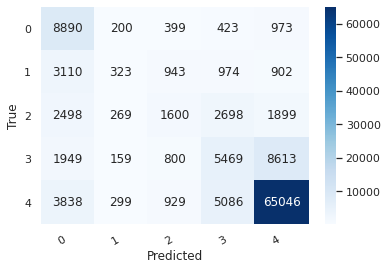

In [168]:
#Base ComplementNB model for sentiment prediction

CNB = ComplementNB()
CNB.fit(ctmTr_score, y_train_score)
CNB_predictions = CNB.predict(X_test_dtm_score)

accuracy = CNB.score(X_test_dtm_score, y_test_score)
print (accuracy)

print(classification_report(y_test_score, CNB_predictions)) 

# creating a confusion matrix
cm = confusion_matrix(y_test_score, CNB_predictions)
hmap = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True')
plt.xlabel('Predicted');
class_names = ['1','2','3','4','5']
df_cm = pd.DataFrame(cm,index=class_names,columns=class_names)

## Observation:
The original dataset with duplicate values gives better performance than the one where duplicates have been dropped. Hence, the original pre-processed dataset shall be used from here on in.

# Undersampled_sentiment dataset vs Oversampled_sentiment dataset 


## Naive Sampling

Reading the pre-processed dataset for Undersampling and Oversampling balancing techniques

In [169]:
x = df_pre_processed.drop('Sentiment',axis=1)
y = df_pre_processed['Sentiment']

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [171]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [172]:
t_dat = pd.concat([X_train,y_train],axis=1)

Defining the negative and positive classes 

In [173]:
neg = t_dat[t_dat.Sentiment==-1]
pos = t_dat[t_dat.Sentiment==1]

### Oversampling

In [177]:
neg_oversampled = resample(neg, #as we are oversampling the neg reviews
                           replace=True, # resampling with replacement
                           n_samples=len(pos), #to make the final number equal to that of positive reviews
                           random_state=27 #for reproducability
                           )

In [178]:
# combining the oversampled negative reviews and original number of positive reviews
oversampled_sentiment = pd.concat([neg_oversampled,pos])

In [179]:
# checking the final numbers
oversampled_sentiment.Sentiment.value_counts()

-1    325567
 1    325567
Name: Sentiment, dtype: int64

In [180]:
# dumping for later use
oversampled_sentiment.to_csv('Oversampled_sentiment.csv')

### Undersampling

In [185]:
pos_downsampled = resample(pos #becasue we are undersampling positive samples
                           ,replace=True #sample with replacement
                           ,n_samples=len(neg) #to make the final number equal to negative reviews
                           ,random_state=27 # for reproducability
                           )

In [186]:
# combine the undersampled positive and original number of negative
undersampled_sentiment = pd.concat([pos_downsampled,neg])

In [187]:
# checking the final numbers
undersampled_sentiment.Sentiment.value_counts()

-1    55297
 1    55297
Name: Sentiment, dtype: int64

In [188]:
# dumping for later use
undersampled_sentiment.to_csv('Undersampled_sentiment.csv')

### viewing the dataframes

In [189]:
undersampled_sentiment.shape

(110594, 12)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'review sentiment for undersampled dataset')

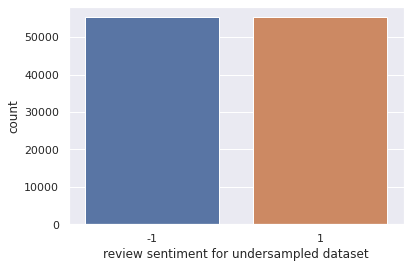

In [190]:
ax = sns.countplot(undersampled_sentiment.Sentiment)
plt.xlabel('review sentiment for undersampled dataset')

In [191]:
oversampled_sentiment.shape

(651134, 12)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'review sentiment for undersampled dataset')

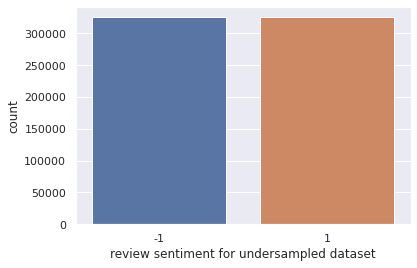

In [192]:
ax = sns.countplot(oversampled_sentiment.Sentiment)
plt.xlabel('review sentiment for undersampled dataset')

## On Undersampled sentiment dataset


The following steps are similar to those employed for the pre-processed dataset with the only difference being that the datset in use is the undersampled_sentiment dataset created in the above section.

In [193]:
X_all_features = undersampled_sentiment['All_features']
y_sentiment = undersampled_sentiment['Sentiment']
y_score = undersampled_sentiment['Score']

In [194]:
X_train_sentiment, X_test_sentiment, y_train_sentiment, y_test_sentiment = train_test_split(X_all_features, y_sentiment, test_size=0.3, random_state=0)

X_train_score, X_test_score, y_train_score, y_test_score = train_test_split(X_all_features, y_score, test_size=0.3, random_state=0)


In [195]:
cv1 = CountVectorizer()
ctmTr_sentiment = cv1.fit_transform(X_train_sentiment) 
X_test_dtm_sentiment = cv1.transform(X_test_sentiment)

0.8871273998613581
              precision    recall  f1-score   support

          -1       0.89      0.89      0.89     16628
           1       0.89      0.89      0.89     16551

    accuracy                           0.89     33179
   macro avg       0.89      0.89      0.89     33179
weighted avg       0.89      0.89      0.89     33179



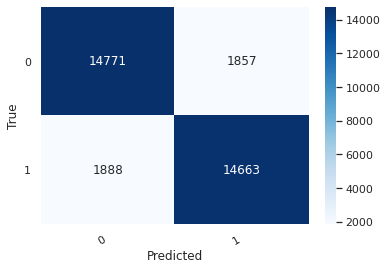

In [196]:
#Base LR for sentiment prediction

logisticRegr = LogisticRegression(max_iter=1000)
logisticRegr.fit(ctmTr_sentiment, y_train_sentiment)
lgr_predictions = logisticRegr.predict(X_test_dtm_sentiment)

accuracy = logisticRegr.score(X_test_dtm_sentiment, y_test_sentiment)
print (accuracy)

print(classification_report(y_test_sentiment, lgr_predictions)) 

# creating a confusion matrix
cm = confusion_matrix(y_test_sentiment, lgr_predictions)
hmap = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True')
plt.xlabel('Predicted');
class_names = ['Negative','Positive']
df_cm = pd.DataFrame(cm,index=class_names,columns=class_names)

In [197]:
cv2 = CountVectorizer()
ctmTr_score = cv2.fit_transform(X_train_score)
X_test_dtm_score = cv2.transform(X_test_score)

0.6672292715271708
              precision    recall  f1-score   support

           1       0.68      0.80      0.74     10589
           2       0.51      0.38      0.44      6039
           3       0.35      0.04      0.07      1477
           4       0.40      0.10      0.16      2864
           5       0.71      0.90      0.80     12210

    accuracy                           0.67     33179
   macro avg       0.53      0.44      0.44     33179
weighted avg       0.62      0.67      0.63     33179



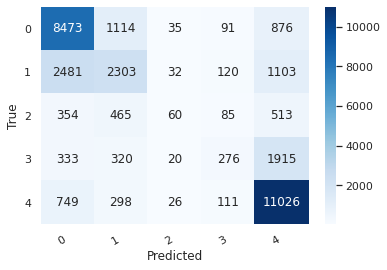

In [198]:
#Base ComplementNB model for sentiment prediction

CNB = ComplementNB()
CNB.fit(ctmTr_score, y_train_score)
CNB_predictions = CNB.predict(X_test_dtm_score)

accuracy = CNB.score(X_test_dtm_score, y_test_score)
print (accuracy)

print(classification_report(y_test_score, CNB_predictions)) 

# creating a confusion matrix
cm = confusion_matrix(y_test_score, CNB_predictions)
hmap = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True')
plt.xlabel('Predicted');
class_names = ['1','2','3','4','5']
df_cm = pd.DataFrame(cm,index=class_names,columns=class_names)

## Observations:
The use of the undersampled dataset has reduced the values of the metrics used for both Sentiment prediction as well as Score prediction. Hence, this datset shall not be further explored. 

## On Oversampled sentiment dataset

The following steps are similar to those employed for the pre-processed dataset with the only difference being that the datset in use is the oversampled_sentiment dataset created in the above section.

In [204]:
X_all_features = oversampled_sentiment['All_features']
y_sentiment = oversampled_sentiment['Sentiment']
y_score = oversampled_sentiment['Score']

In [205]:
X_train_sentiment, X_test_sentiment, y_train_sentiment, y_test_sentiment = train_test_split(X_all_features, y_sentiment, test_size=0.3, random_state=0)

X_train_score, X_test_score, y_train_score, y_test_score = train_test_split(X_all_features, y_score, test_size=0.3, random_state=0)


In [206]:
cv1 = CountVectorizer()
ctmTr_sentiment = cv1.fit_transform(X_train_sentiment) 
X_test_dtm_sentiment = cv1.transform(X_test_sentiment)

0.9217419794103644
              precision    recall  f1-score   support

          -1       0.91      0.93      0.92     97666
           1       0.93      0.91      0.92     97675

    accuracy                           0.92    195341
   macro avg       0.92      0.92      0.92    195341
weighted avg       0.92      0.92      0.92    195341



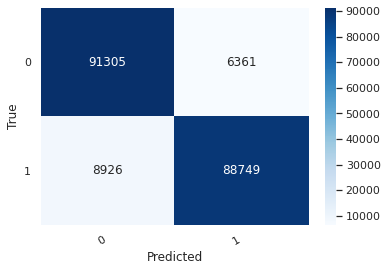

In [207]:
#Base LR for sentiment prediction

logisticRegr = LogisticRegression(max_iter=1000)
logisticRegr.fit(ctmTr_sentiment, y_train_sentiment)
lgr_predictions = logisticRegr.predict(X_test_dtm_sentiment)

accuracy = logisticRegr.score(X_test_dtm_sentiment, y_test_sentiment)
print (accuracy)

print(classification_report(y_test_sentiment, lgr_predictions)) 

# creating a confusion matrix
cm = confusion_matrix(y_test_sentiment, lgr_predictions)
hmap = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True')
plt.xlabel('Predicted');
class_names = ['Negative','Positive']
df_cm = pd.DataFrame(cm,index=class_names,columns=class_names)

In [208]:
cv2 = CountVectorizer()
ctmTr_score = cv2.fit_transform(X_train_score)
X_test_dtm_score = cv2.transform(X_test_score)

0.705868199712298
              precision    recall  f1-score   support

           1       0.72      0.83      0.77     62467
           2       0.60      0.49      0.54     35199
           3       0.64      0.04      0.08      8604
           4       0.45      0.09      0.16     16053
           5       0.74      0.91      0.82     73018

    accuracy                           0.71    195341
   macro avg       0.63      0.47      0.47    195341
weighted avg       0.68      0.71      0.67    195341



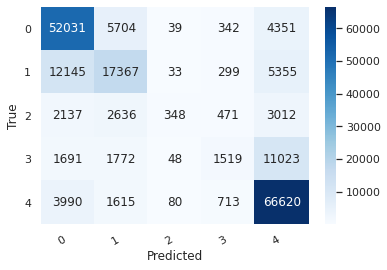

In [209]:
#Base ComplementNB model for sentiment prediction

CNB = ComplementNB()
CNB.fit(ctmTr_score, y_train_score)
CNB_predictions = CNB.predict(X_test_dtm_score)

accuracy = CNB.score(X_test_dtm_score, y_test_score)
print (accuracy)

print(classification_report(y_test_score, CNB_predictions)) 

# creating a confusion matrix
cm = confusion_matrix(y_test_score, CNB_predictions)
hmap = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True')
plt.xlabel('Predicted');
class_names = ['1','2','3','4','5']
df_cm = pd.DataFrame(cm,index=class_names,columns=class_names)

## Observations:
1. This dataset has better performance that the pre-processed dataset when it comes to Sentiment prediction. Hence, currently the oversampled_sentimnet dataset will be considered fit for Sentiment_prediction unless a better dataset is discovered in the next sections.
2. This dataset however does not perform sufficiently better when it comes to Score prediction. Hence, the pre-processed dataset will continue to be used as the best fit for score prediction unless a better dataset is discovered in the next sections.

# Undersampled_score dataset vs Oversampled_score dataset 

## Balancing scores


Reading the pre-processed dataset for Undersampling and Oversampling balancing techniques

In [210]:
x = df_pre_processed.drop('Score',axis=1)
y = df_pre_processed['Score']

In [212]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [213]:
t_dat = pd.concat([X_train,y_train],axis=1)

Defining the 5 different classes based on scores.
From the visualization section, it can be seen that Score=2 has the least number of entries and Score=5 has the greatest

In [214]:
class_1 = t_dat[t_dat.Score==1]
class_2 = t_dat[t_dat.Score==2]
class_3 = t_dat[t_dat.Score==3]
class_4 = t_dat[t_dat.Score==4]
class_5 = t_dat[t_dat.Score==5]

### Oversampling scores


All the classes will be made to have the same number of entries as class_5, the one with the highest number of entries.

In [215]:
class_1_oversampled = resample(class_1, 
                           replace=True, 
                           n_samples=len(class_5), 
                           random_state=27 
                           )
class_2_oversampled = resample(class_2, 
                           replace=True, 
                           n_samples=len(class_5), 
                           random_state=27 
                           )
class_3_oversampled = resample(class_3, 
                           replace=True, 
                           n_samples=len(class_5), 
                           random_state=27 
                           )
class_4_oversampled = resample(class_4, 
                           replace=True, 
                           n_samples=len(class_5), 
                           random_state=27 
                           )

In [216]:
oversampled_scores = pd.concat([class_1_oversampled,class_2_oversampled,class_3_oversampled,class_4_oversampled,class_5])

In [217]:
oversampled_scores.Score.value_counts()

5    243178
4    243178
3    243178
2    243178
1    243178
Name: Score, dtype: int64

In [218]:
# dumping for later use
oversampled_scores.to_csv('Oversampled_scores.csv')

### Undersampling scores

All the classes will be made to have the same number of entries as class_2, the one with the lowest number of entries.

In [219]:
class_1_downsampled = resample(class_1 
                           ,replace=True 
                           ,n_samples=len(class_2) 
                           ,random_state=27 
                           )
class_3_downsampled = resample(class_3 
                           ,replace=True 
                           ,n_samples=len(class_2) 
                           ,random_state=27 
                           )
class_4_downsampled = resample(class_4 
                           ,replace=True 
                           ,n_samples=len(class_2) 
                           ,random_state=27 
                           )
class_5_downsampled = resample(class_5 
                           ,replace=True 
                           ,n_samples=len(class_2) 
                           ,random_state=27 
                           )

In [220]:
undersampled_scores = pd.concat([class_1_downsampled,class_2,class_3_downsampled,class_4_downsampled,class_5_downsampled])

In [221]:
undersampled_scores.Score.value_counts()

5    20072
4    20072
3    20072
2    20072
1    20072
Name: Score, dtype: int64

In [222]:
# dumping for later use
undersampled_scores.to_csv('Undersampled_scores.csv')

### viewing the dataframes

In [223]:
undersampled_scores.shape

(100360, 12)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'review score for undersampled dataset')

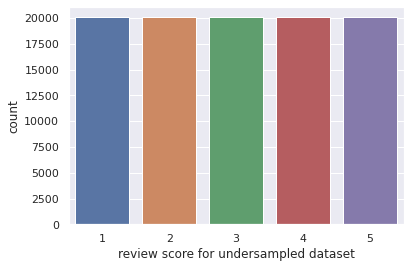

In [224]:
ax = sns.countplot(undersampled_scores.Score)
plt.xlabel('review score for undersampled dataset')

In [225]:
oversampled_scores.shape

(1215890, 12)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'review score for oversampled dataset')

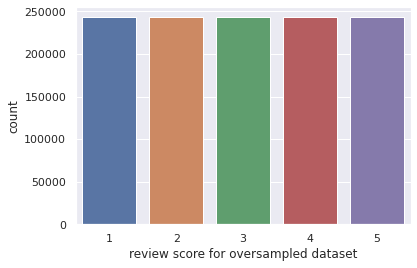

In [226]:
ax = sns.countplot(oversampled_scores.Score)
plt.xlabel('review score for oversampled dataset')

## On Undersampled score dataset


The following steps are similar to those employed for the pre-processed dataset with the only difference being that the datset in use is the undersampled_score dataset created in the above section.

In [231]:
X_all_features = undersampled_scores['All_features']
y_sentiment = undersampled_scores['Sentiment']
y_score = undersampled_scores['Score']

In [232]:
X_train_sentiment, X_test_sentiment, y_train_sentiment, y_test_sentiment = train_test_split(X_all_features, y_sentiment, test_size=0.3, random_state=0)

X_train_score, X_test_score, y_train_score, y_test_score = train_test_split(X_all_features, y_score, test_size=0.3, random_state=0)


In [233]:
cv1 = CountVectorizer()
ctmTr_sentiment = cv1.fit_transform(X_train_sentiment) 
X_test_dtm_sentiment = cv1.transform(X_test_sentiment)

0.8427660422479075
              precision    recall  f1-score   support

          -1       0.81      0.78      0.80     11970
           1       0.86      0.88      0.87     18138

    accuracy                           0.84     30108
   macro avg       0.84      0.83      0.83     30108
weighted avg       0.84      0.84      0.84     30108



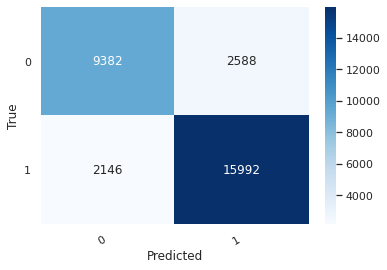

In [234]:
#Base LR for sentiment prediction

logisticRegr = LogisticRegression(max_iter=1000)
logisticRegr.fit(ctmTr_sentiment, y_train_sentiment)
lgr_predictions = logisticRegr.predict(X_test_dtm_sentiment)

accuracy = logisticRegr.score(X_test_dtm_sentiment, y_test_sentiment)
print (accuracy)

print(classification_report(y_test_sentiment, lgr_predictions)) 

# creating a confusion matrix
cm = confusion_matrix(y_test_sentiment, lgr_predictions)
hmap = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True')
plt.xlabel('Predicted');
class_names = ['Negative','Positive']
df_cm = pd.DataFrame(cm,index=class_names,columns=class_names)

In [235]:
cv2 = CountVectorizer()
ctmTr_score = cv2.fit_transform(X_train_score)
X_test_dtm_score = cv2.transform(X_test_score)

0.5368340640361365
              precision    recall  f1-score   support

           1       0.53      0.77      0.63      6059
           2       0.53      0.35      0.42      5911
           3       0.53      0.39      0.45      6002
           4       0.50      0.45      0.47      6110
           5       0.57      0.72      0.64      6026

    accuracy                           0.54     30108
   macro avg       0.53      0.54      0.52     30108
weighted avg       0.53      0.54      0.52     30108



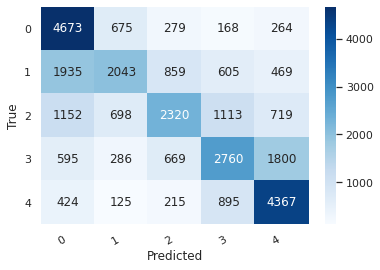

In [236]:
#Base ComplementNB model for sentiment prediction

CNB = ComplementNB()
CNB.fit(ctmTr_score, y_train_score)
CNB_predictions = CNB.predict(X_test_dtm_score)

accuracy = CNB.score(X_test_dtm_score, y_test_score)
print (accuracy)

print(classification_report(y_test_score, CNB_predictions)) 

# creating a confusion matrix
cm = confusion_matrix(y_test_score, CNB_predictions)
hmap = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True')
plt.xlabel('Predicted');
class_names = ['1','2','3','4','5']
df_cm = pd.DataFrame(cm,index=class_names,columns=class_names)

## Observations : This dataset performs poorly when compared to the best fit datasets for Sentiment prediction (oversampled_sentiment dataset) as well as Score prediction (pre-processed dataset). Hence, it shall not be explored further.

## On Oversampled score dataset

The following steps are similar to those employed for the pre-processed dataset with the only difference being that the datset in use is the oversampled_score dataset created in the above section.

In [237]:
X_all_features = oversampled_scores['All_features']
y_sentiment = oversampled_scores['Sentiment']
y_score = oversampled_scores['Score']

In [238]:
X_train_sentiment, X_test_sentiment, y_train_sentiment, y_test_sentiment = train_test_split(X_all_features, y_sentiment, test_size=0.3, random_state=0)

X_train_score, X_test_score, y_train_score, y_test_score = train_test_split(X_all_features, y_score, test_size=0.3, random_state=0)


In [239]:
cv1 = CountVectorizer()
ctmTr_sentiment = cv1.fit_transform(X_train_sentiment) 
X_test_dtm_sentiment = cv1.transform(X_test_sentiment)

0.8963475314378768
              precision    recall  f1-score   support

          -1       0.88      0.86      0.87    145313
           1       0.91      0.92      0.91    219454

    accuracy                           0.90    364767
   macro avg       0.89      0.89      0.89    364767
weighted avg       0.90      0.90      0.90    364767



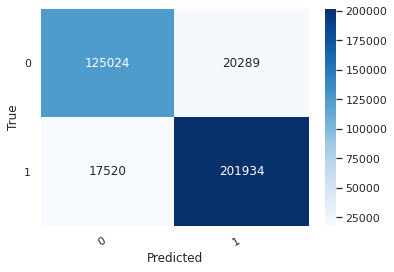

In [241]:
#Base LR for sentiment prediction

logisticRegr = LogisticRegression(max_iter=2000)
logisticRegr.fit(ctmTr_sentiment, y_train_sentiment)
lgr_predictions = logisticRegr.predict(X_test_dtm_sentiment)

accuracy = logisticRegr.score(X_test_dtm_sentiment, y_test_sentiment)
print (accuracy)

print(classification_report(y_test_sentiment, lgr_predictions)) 

# creating a confusion matrix
cm = confusion_matrix(y_test_sentiment, lgr_predictions)
hmap = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True')
plt.xlabel('Predicted');
class_names = ['Negative','Positive']
df_cm = pd.DataFrame(cm,index=class_names,columns=class_names)

In [242]:
cv2 = CountVectorizer()
ctmTr_score = cv2.fit_transform(X_train_score)
X_test_dtm_score = cv2.transform(X_test_score)

0.5971784728333429
              precision    recall  f1-score   support

           1       0.57      0.80      0.66     72503
           2       0.64      0.48      0.55     72810
           3       0.63      0.45      0.52     73198
           4       0.57      0.51      0.54     73243
           5       0.60      0.75      0.67     73013

    accuracy                           0.60    364767
   macro avg       0.60      0.60      0.59    364767
weighted avg       0.60      0.60      0.59    364767



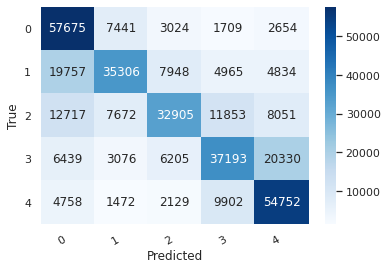

In [243]:
#Base ComplementNB model for sentiment prediction

CNB = ComplementNB()
CNB.fit(ctmTr_score, y_train_score)
CNB_predictions = CNB.predict(X_test_dtm_score)

accuracy = CNB.score(X_test_dtm_score, y_test_score)
print (accuracy)

print(classification_report(y_test_score, CNB_predictions)) 

# creating a confusion matrix
cm = confusion_matrix(y_test_score, CNB_predictions)
hmap = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True')
plt.xlabel('Predicted');
class_names = ['1','2','3','4','5']
df_cm = pd.DataFrame(cm,index=class_names,columns=class_names)

## Observations : This dataset performs poorly when compared to the best fit datasets for Sentiment prediction (oversampled_sentiment dataset) as well as Score prediction (pre-processed dataset). Hence, it shall not be explored further.

# Sentiment prediction final

As can be seen from the above sections, the best dataset for sentiment prediction when using the CountVectorizer() and the base Logisticregression() model is the oversampled_sentiment dataset, we shall develop our final model with this dataset.

In [273]:
X_all_features = oversampled_sentiment['All_features']
y_sentiment = oversampled_sentiment['Sentiment']
y_score = oversampled_sentiment['Score']

In [274]:
X_train_sentiment, X_test_sentiment, y_train_sentiment, y_test_sentiment = train_test_split(X_all_features, y_sentiment, test_size=0.3, random_state=0)

X_train_score, X_test_score, y_train_score, y_test_score = train_test_split(X_all_features, y_score, test_size=0.3, random_state=0)


In [275]:
cv1 = CountVectorizer()
ctmTr_sentiment = cv1.fit_transform(X_train_sentiment) 
X_test_dtm_sentiment = cv1.transform(X_test_sentiment)

0.9217419794103644
              precision    recall  f1-score   support

          -1       0.91      0.93      0.92     97666
           1       0.93      0.91      0.92     97675

    accuracy                           0.92    195341
   macro avg       0.92      0.92      0.92    195341
weighted avg       0.92      0.92      0.92    195341



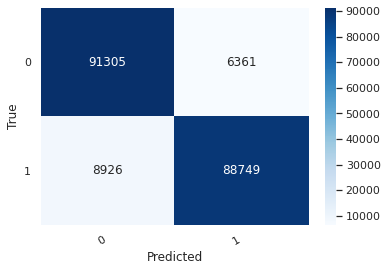

In [247]:
#Base LR for sentiment prediction

logisticRegr = LogisticRegression(max_iter=1000)
logisticRegr.fit(ctmTr_sentiment, y_train_sentiment)
lgr_predictions = logisticRegr.predict(X_test_dtm_sentiment)

accuracy = logisticRegr.score(X_test_dtm_sentiment, y_test_sentiment)
print (accuracy)

print(classification_report(y_test_sentiment, lgr_predictions)) 

# creating a confusion matrix
cm = confusion_matrix(y_test_sentiment, lgr_predictions)
hmap = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True')
plt.xlabel('Predicted');
class_names = ['Negative','Positive']
df_cm = pd.DataFrame(cm,index=class_names,columns=class_names)

Checking out the various tunable parametres in LogisticRegression() 

In [248]:
model = LogisticRegression()
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Using GridSearchCV() to find out the highest possible accuracy this model can give for the given dataset and also the Hyperparametre that correspond to the same.

In [281]:
# define model
model = LogisticRegression(max_iter=1000)
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['C'] = [10**-4, 10**-2, 1, 10**2, 10**4]
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result = search.fit(ctmTr_sentiment, y_train_sentiment)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9217419794103644
Best Hyperparameters: {'C': 1}


Using MultinomialNB() as another model for sentiment prediction

0.8705033761473526
              precision    recall  f1-score   support

          -1       0.88      0.85      0.87     97666
           1       0.86      0.89      0.87     97675

    accuracy                           0.87    195341
   macro avg       0.87      0.87      0.87    195341
weighted avg       0.87      0.87      0.87    195341



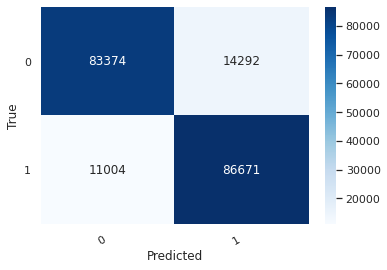

In [250]:
MNB = MultinomialNB()
MNB.fit(ctmTr_sentiment, y_train_sentiment)
MNB_predictions = MNB.predict(X_test_dtm_sentiment)

accuracy = MNB.score(X_test_dtm_sentiment, y_test_sentiment)
print (accuracy)

print(classification_report(y_test_sentiment, MNB_predictions)) 

# creating a confusion matrix
cm = confusion_matrix(y_test_sentiment, MNB_predictions)
hmap = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True')
plt.xlabel('Predicted');
class_names = ['Negative','Positive']
df_cm = pd.DataFrame(cm,index=class_names,columns=class_names)


Checking out the various tunable parametres in MultinomialNB() 

In [251]:
model = MultinomialNB()
model

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Using GridSearchCV() to find out the highest possible accuracy this model can give for the given dataset and also the Hyperparametre that correspond to the same.

In [252]:
# define model
model = MultinomialNB()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['alpha'] = [3,3.25,3.5,3.75,4,4.25,4.5,4.75,5]
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result = search.fit(ctmTr_sentiment, y_train_sentiment)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8666470718588624
Best Hyperparameters: {'alpha': 3}


Using BernoulliNB() as another model for sentiment prediction

0.8547258384056599
              precision    recall  f1-score   support

          -1       0.88      0.85      0.87     97666
           1       0.86      0.89      0.87     97675

    accuracy                           0.87    195341
   macro avg       0.87      0.87      0.87    195341
weighted avg       0.87      0.87      0.87    195341



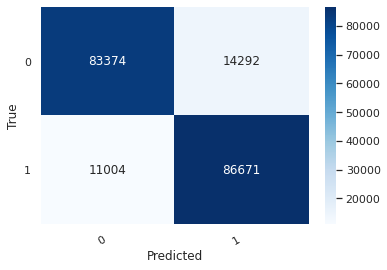

In [253]:
#Base BernoulliNB model for sentiment prediction

BNB = BernoulliNB()
BNB.fit(ctmTr_sentiment, y_train_sentiment)
BNB_predictions = MNB.predict(X_test_dtm_sentiment)

accuracy = BNB.score(X_test_dtm_sentiment, y_test_sentiment)
print (accuracy)

print(classification_report(y_test_sentiment, BNB_predictions)) 

# creating a confusion matrix
cm = confusion_matrix(y_test_sentiment, BNB_predictions)
hmap = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True')
plt.xlabel('Predicted');
class_names = ['Negative','Positive']
df_cm = pd.DataFrame(cm,index=class_names,columns=class_names)

Checking out the various tunable parametres in BernoulliNB() 

In [254]:
model = BernoulliNB()
model

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

Using GridSearchCV() to find out the highest possible accuracy this model can give for the given dataset and also the Hyperparametre that correspond to the same.

In [255]:
# define model
model = BernoulliNB()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['alpha'] = [10**-5,10**-4, 10**-3,10**-2, 10**-1,0.5, 1,1.5]
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result = search.fit(ctmTr_sentiment, y_train_sentiment)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8633692682053182
Best Hyperparameters: {'alpha': 1e-05}


Using ComplementNB() as another model for sentiment prediction

0.8705084954003511
              precision    recall  f1-score   support

          -1       0.88      0.85      0.87     97666
           1       0.86      0.89      0.87     97675

    accuracy                           0.87    195341
   macro avg       0.87      0.87      0.87    195341
weighted avg       0.87      0.87      0.87    195341



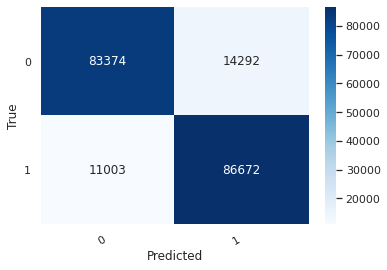

In [256]:
#Base ComplementNB model for sentiment prediction

CNB = ComplementNB()
CNB.fit(ctmTr_sentiment, y_train_sentiment)
CNB_predictions = CNB.predict(X_test_dtm_sentiment)

accuracy = CNB.score(X_test_dtm_sentiment, y_test_sentiment)
print (accuracy)

print(classification_report(y_test_sentiment, CNB_predictions)) 

# creating a confusion matrix
cm = confusion_matrix(y_test_sentiment, CNB_predictions)
hmap = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True')
plt.xlabel('Predicted');
class_names = ['Negative','Positive']
df_cm = pd.DataFrame(cm,index=class_names,columns=class_names)

Checking out the various tunable hyperparametres in ComplementNB()

In [257]:
model = ComplementNB()
model

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

Using GridSearchCV() to find out the highest possible accuracy this model can give for the given dataset and also the Hyperparametre that correspond to the same.

In [258]:
# define model
model = ComplementNB()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['alpha'] = [4,5,6,7,8,9]
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result = search.fit(ctmTr_sentiment, y_train_sentiment)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8657767940301496
Best Hyperparameters: {'alpha': 4}


Creating an essemble model using the basic models used above with the best set of hyperparametres to develop a model with the greatest performance.

In [277]:
def get_stacking_sentiment():
	# define the base models
	level0 = []
	level0.append(('LR', LogisticRegression(C=1,max_iter=1000)))
	level0.append(('MNB', MultinomialNB(alpha=3)))
	level0.append(('BNB', BernoulliNB(alpha=1e-5)))
	level0.append(('CNB', ComplementNB(alpha=4)))
	
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

Checking out the performance of the essemble model

0.9219365110243113
              precision    recall  f1-score   support

          -1       0.92      0.93      0.92     97666
           1       0.93      0.92      0.92     97675

    accuracy                           0.92    195341
   macro avg       0.92      0.92      0.92    195341
weighted avg       0.92      0.92      0.92    195341



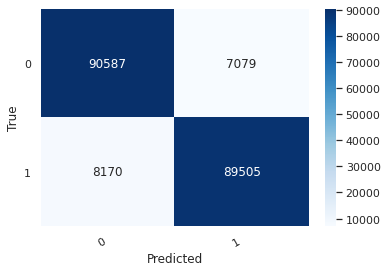

In [278]:
model_sentiment = get_stacking_sentiment()
model_sentiment.fit(ctmTr_sentiment, y_train_sentiment)
model_predictions = model_sentiment.predict(X_test_dtm_sentiment)

accuracy = model_sentiment.score(X_test_dtm_sentiment, y_test_sentiment)
print (accuracy)

print(classification_report(y_test_sentiment, model_predictions)) 

# creating a confusion matrix
cm = confusion_matrix(y_test_sentiment, model_predictions)
hmap = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True')
plt.xlabel('Predicted');
class_names = ['Negative','Positive']
df_cm = pd.DataFrame(cm,index=class_names,columns=class_names)

Saving this model for further use

In [279]:
import joblib
filename = 'sentiment_prediction_model.sav'
joblib.dump(model_sentiment, filename)

['sentiment_prediction_model.sav']

Saving the embedding vocabulary for further use

In [280]:
filename = 'vocabulary.sav'
joblib.dump(cv1.vocabulary_, filename)

['vocabulary.sav']

# Score Prediction final

As can be seen from the above sections, the best dataset for score prediction when using the CountVectorizer() and the base ComplementNB() model is the pre-processed dataset, we shall develop our final model with this dataset.

In [260]:
X_all_features = df_pre_processed['All_features']
y_sentiment = df_pre_processed['Sentiment']
y_score = df_pre_processed['Score']

In [261]:
X_train_sentiment, X_test_sentiment, y_train_sentiment, y_test_sentiment = train_test_split(X_all_features, y_sentiment, test_size=0.3, random_state=0)

X_train_score, X_test_score, y_train_score, y_test_score = train_test_split(X_all_features, y_score, test_size=0.3, random_state=0)


In [262]:
cv2 = CountVectorizer()
ctmTr_score = cv2.fit_transform(X_train_score) 
X_test_dtm_score = cv2.transform(X_test_score)

0.7048910207169119
              precision    recall  f1-score   support

           1       0.45      0.82      0.58     15594
           2       0.47      0.13      0.20      9157
           3       0.42      0.24      0.31     12687
           4       0.41      0.36      0.38     24325
           5       0.85      0.87      0.86    108774

    accuracy                           0.70    170537
   macro avg       0.52      0.48      0.47    170537
weighted avg       0.70      0.70      0.69    170537



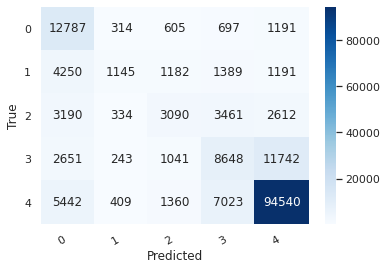

In [ ]:
#Base ComplementNB model for sentiment prediction

CNB = ComplementNB()
CNB.fit(ctmTr_score, y_train_score)
CNB_predictions = CNB.predict(X_test_dtm_score)

accuracy = CNB.score(X_test_dtm_score, y_test_score)
print (accuracy)

print(classification_report(y_test_score, CNB_predictions)) 

# creating a confusion matrix
cm = confusion_matrix(y_test_score, CNB_predictions)
hmap = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True')
plt.xlabel('Predicted');
class_names = ['1','2','3','4','5']
df_cm = pd.DataFrame(cm,index=class_names,columns=class_names)

Using GridSearchCV() to find out the highest possible accuracy this model can give for the given dataset and also the Hyperparametre that correspond to the same.

In [ ]:
# define model
model = ComplementNB()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['alpha'] = [1e-4,1e-3,1e-2,1e-1,0.5,2,3,4,5,6,7,8,8.5,9,9.5]
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result = search.fit(ctmTr_score, y_train_score)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7125707073067218
Best Hyperparameters: {'alpha': 9}


Using MultinomialNB() as another model for score prediction

0.7061165612154547
              precision    recall  f1-score   support

           1       0.56      0.66      0.60     15594
           2       0.42      0.24      0.31      9157
           3       0.40      0.31      0.35     12687
           4       0.40      0.38      0.39     24325
           5       0.83      0.87      0.85    108774

    accuracy                           0.71    170537
   macro avg       0.52      0.49      0.50    170537
weighted avg       0.69      0.71      0.70    170537



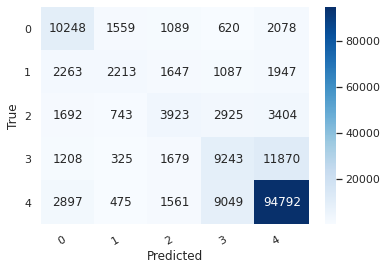

In [263]:
#Base MultinomialNB model for score prediction

MNB = MultinomialNB()
MNB.fit(ctmTr_score, y_train_score)
MNB_predictions = MNB.predict(X_test_dtm_score)

accuracy = MNB.score(X_test_dtm_score, y_test_score)
print (accuracy)

print(classification_report(y_test_score, MNB_predictions)) 

# creating a confusion matrix
cm = confusion_matrix(y_test_score, MNB_predictions)
hmap = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True')
plt.xlabel('Predicted');
class_names = ['1','2','3','4','5']
df_cm = pd.DataFrame(cm,index=class_names,columns=class_names)

Using GridSearchCV() to find out the highest possible accuracy this model can give for the given dataset and also the Hyperparametre that correspond to the same.

In [264]:
# define model
model = MultinomialNB()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['alpha'] = [1,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4]
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result = search.fit(ctmTr_score, y_train_score)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7084316541565383
Best Hyperparameters: {'alpha': 3}


Using BernoulliNB() as another model for score prediction

0.6669813588839959
              precision    recall  f1-score   support

           1       0.59      0.58      0.59     15594
           2       0.48      0.14      0.22      9157
           3       0.37      0.25      0.29     12687
           4       0.34      0.31      0.32     24325
           5       0.76      0.85      0.80    108774

    accuracy                           0.67    170537
   macro avg       0.51      0.43      0.45    170537
weighted avg       0.64      0.67      0.65    170537



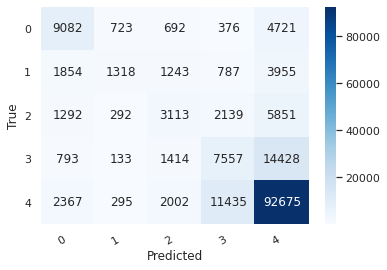

In [265]:
#Base BernoulliNB model for sentiment prediction

BNB = BernoulliNB()
BNB.fit(ctmTr_score, y_train_score)
BNB_predictions = BNB.predict(X_test_dtm_score)

accuracy = BNB.score(X_test_dtm_score, y_test_score)
print (accuracy)

print(classification_report(y_test_score, BNB_predictions)) 

# creating a confusion matrix
cm = confusion_matrix(y_test_score, BNB_predictions)
hmap = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True')
plt.xlabel('Predicted');
class_names = ['1','2','3','4','5']
df_cm = pd.DataFrame(cm,index=class_names,columns=class_names)

Using GridSearchCV() to find out the highest possible accuracy this model can give for the given dataset and also the Hyperparametre that correspond to the same.

In [266]:
# define model
model = BernoulliNB()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['alpha'] = [10**-10,10**-9, 10**-8,10**-7,10**-6,10**-5,10**-4, 10**-3,10**-2, 10**-1,0.5, 1,1.5]
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result = search.fit(ctmTr_score, y_train_score)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.6817485319209974
Best Hyperparameters: {'alpha': 1e-10}


Creating an essemble model using the basic models used above with the best set of hyperparametres to develop a model with the greatest performance.

In [269]:
def get_stacking_score():
	# define the base models
	level0 = []
	level0.append(('MNB', MultinomialNB(alpha=3)))
	level0.append(('BNB', BernoulliNB(alpha=1e-10)))
	level0.append(('CNB', ComplementNB(alpha=9)))
	
	# define meta learner model
	level1 = ComplementNB()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

Checking out the performance of the essemble model

0.7159619320147534
              precision    recall  f1-score   support

           1       0.51      0.79      0.62     15594
           2       0.48      0.14      0.22      9157
           3       0.40      0.32      0.36     12687
           4       0.45      0.31      0.37     24325
           5       0.83      0.89      0.86    108774

    accuracy                           0.72    170537
   macro avg       0.53      0.49      0.48    170537
weighted avg       0.70      0.72      0.70    170537



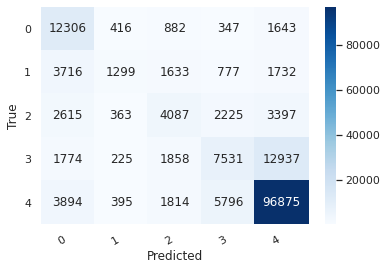

In [270]:
model_score = get_stacking_score()
model_score.fit(ctmTr_score, y_train_score)
model_predictions = model_score.predict(X_test_dtm_score)

accuracy = model_score.score(X_test_dtm_score, y_test_score)
print (accuracy)

print(classification_report(y_test_score, model_predictions)) 

# creating a confusion matrix
cm = confusion_matrix(y_test_score, model_predictions)
hmap = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True')
plt.xlabel('Predicted');
class_names = ['1','2','3','4','5']
df_cm = pd.DataFrame(cm,index=class_names,columns=class_names)

Saving this model for further use

In [271]:
import joblib
filename = 'score_prediction_model.sav'
joblib.dump(model_score, filename)

['score_prediction_model.sav']

# Predicting on raw data


Helper function to convert raw text input to format that can be used on the Sentiment and score prediction models

In [ ]:
raw_text = str(input("Enter review")) 

def preprocess_raw_text(text):
  text = clean_url(text)
  text = clean_non_alpha(text)
  text = clean_lowercase(text)
  text = clean_tokenizer(text)
  text = clean_stopwords(text)
  text = clean_stem(text)
  text = clean_lemmatization(text)
  text = clean_length(text)
  text = convert_to_string(text)
  text = [text]
  cv = joblib.load('vocabulary.sav')
  text = cv.transform(text)

  return text

raw_text_processed = preprocess_raw_text(raw_text)


Function to predict the score of a given input review

In [ ]:
def final_output_score(text):
  Score_pred = joblib.load('score_prediction_model.sav')
  Score_pred_raw_text = Score_pred.predict(text)

  return Score_pred_raw_text

score_output = final_output_score(raw_text_processed)
print(score_output)

Function to predict the sentiment of a given input review

In [ ]:
def final_output_sentiment(text):
  Sentiment_pred = joblib.load('sentiment_prediction_model.sav')
  Sentiment_pred_2_raw_text = Sentiment_pred.predict(text)
  if (Sentiment_pred_2_raw_text==1):
    return "Positive review"
  else:
    return "Negative review" 

sentiment_output = final_output_sentiment(raw_text_processed)
print(sentiment_output)